In [3]:
import os as oss
oss.chdir('C:/Users/User/Desktop/Анализ данных/ЛР4-2')

In [4]:
import pandas as pd
data=pd.read_table('Леденцы.dat', sep=';')
data.head(10)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
5,5,4,5,5,3,3,3,3,3,3,3
6,5,5,4,5,3,3,3,3,3,3,3
7,5,4,5,5,3,3,3,3,3,3,3
8,5,5,5,5,3,3,3,3,3,3,3
9,5,4,5,4,3,3,3,3,3,3,3


In [5]:
data.shape

(338, 11)

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [7]:
#выбираем способы и рассчитываем расстояния между наблюдениями(расстояние Евклида) и между кластерами(по методу Варда)
link = linkage(data, 'ward', 'euclidean')

In [8]:
#строим дендрограмму(наглядная визуализация расстояний между данными и между возможными кластерами)
dg=dendrogram(link, labels=data.index.tolist(),
                truncate_mode='lastp',
                color_threshold=5,
                orientation = "right",
                leaf_rotation=0.)

In [9]:
#выводим точные значения расстояний для более грамотного дальнейшего указания значения расстояния 
#при иерархической кластеризации
dist=link[:,2]
dst=pd.DataFrame(dist)[0].sort_values(ascending=False)
list(dst[dst>0])

[51.70554707678618,
 43.44161878227194,
 30.218290213768693,
 13.030135823398284,
 10.216433340656687,
 8.492026643401186,
 7.1867934435323795,
 7.178279428961629,
 6.551494327409428,
 5.979278026585448,
 5.427934204985922,
 5.381787469199835,
 5.381126437757289,
 5.1155949966071566,
 5.024684828635389,
 4.702245326555291,
 3.7653389990514503,
 3.6566964013202647,
 3.399209003391744,
 3.346640106136303,
 3.273268353539885,
 3.0983866769659336,
 2.765027694483457,
 2.6832815729997477,
 2.6832815729997472,
 2.5819888974716103,
 2.556038601690775,
 2.309401076758503,
 2.2211108331943574,
 1.9518001458970662,
 1.9364916731037085,
 1.9300970766452978,
 1.8257418583505536,
 1.8257418583505534,
 1.7320508075688772,
 1.7320508075688772,
 1.6903085094570327,
 1.632993161855452,
 1.632993161855452,
 1.4142135623730951,
 1.4142135623730951,
 1.3587324409735146,
 1.3416407864998734,
 1.1547005383792515]

Text(0, 0.5, 'Distance')

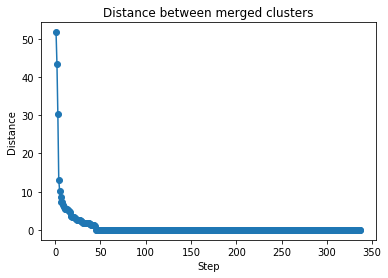

In [10]:
#строим каменистую осыпь(зависимость выбранного растояния от числа кластеров)
#основная идея:расделение на кластеры оптимально в том случае, 
#если при дальнейшем разделении расстояние (примерно) не изменяется
import matplotlib.pyplot as plt
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

In [12]:
#заметно, что после значения 9 темп уменьшения расстояния заметно сокращается, значит выбор такого ограничения по расстоянию 
#довольно адекватен
data['cluster'] = fcluster(link, 15, criterion='distance')
data.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [1]:
#ВЫВОДЫ
#получили на выходе 4 кластера
#1. люди этой группы в большинстве своём испоьзуют леденцы для поддержание хорошего самочувствия и профилактики заболеваний
#2. люди этой группы в большинстве своём испоьзуют леденцы для поддержания полости рта в хорошем, приятном состоянии, 
#также это придаёт им уверенности
#3. людям этой группы леденцы помогают сконцентрироваться и сфокусировать мысли на конкретной задаче
#4. люди этой группы в большинстве своём испоьзуют леденцы, т. к. они заменяют им сладкое
#ФИНАЛЬНЫЙ ВЫВОД
#при попытке поиграться с выбранным расстоянием, становится очевидно, что оптимальное число-кластеров-4,
#так как при уменьшении расстояния число кластеров увеличиваются, а характеристики новых кластеров 
#практически идентичны со "старыми"